# Lesson 101: Detect Credit Card Defaulters - Decision Tree III

---

#### Detect Credit Card Defaulters - Problem Statement

The Taiwanese bank has issued credit cards to many of its clients. They have maintained a dataset of credit card `DEFAULTERS` for a period from April 2005 to September 2005.

You need to build a **Decision Tree** model to predict whether or not the client will pay the credit card bill for the next month.

Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. This can improve the customer screening process and also helps in assessing the credibility of the customer. It also helps banks in reducing the spending limit of the credit card holder or initiate legal steps for amount recovery.

**Dataset Description**

The dataset contains 30,000 rows and 25 columns. Each column represents an attribute of the customer as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|ID|ID of each customer, which has been masked to display serial number to hide confidential customer information (Integer)|
|2|LIMIT_BAL|Amount of given credit in NT dollars (including supplementary credit cards) (Float)|
|3|SEX|Gender (1=male, 2=female) (Integer)|
|4|EDUCATION| (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) (Integer)|
|5|MARRIAGE|Marital status (1=married, 2=single, 3=others) (Integer)|
|6|AGE|Customer age in years (Integer)|
|7|PAY_0|Repayment status in September, 2005 (-1=paid on time, 1=payment delay for one month, 2=payment delay for two months, … , 8=payment delay for eight months and above) (Integer)|
|8|PAY_2|Repayment status in August, 2005 (scale same as above) (Integer)|
|9|PAY_3|Repayment status in July, 2005 (scale same as above) (Integer)|
|10|PAY_4|Repayment status in June, 2005 (scale same as above) (Integer)|
|11|PAY_5|Repayment status in May, 2005 (scale same as above) (Integer)|
|12|PAY_6|Repayment status in April, 2005 (scale same as above) (Integer)|
|13|BILL_AMT1|Amount of bill statement in September, 2005 (NT dollar) (Float)|
|14|BILL_AMT2|Amount of bill statement in August, 2005 (NT dollar) (Float)|
|15|BILL_AMT3|Amount of bill statement in July, 2005 (NT dollar) (Float)|
|16|BILL_AMT4|Amount of bill statement in June, 2005 (NT dollar) (Float)|
|17|BILL_AMT5|Amount of bill statement in May, 2005 (NT dollar) (Float)|
|18|BILL_AMT6|Amount of bill statement in April, 2005 (NT dollar) (Float)|
|19|PAY_AMT1|Amount of previous payment in September, 2005 (NT dollar) (Float)|
|20|PAY_AMT2|Amount of previous payment in August, 2005 (NT dollar) (Float)|
|21|PAY_AMT3|Amount of previous payment in July, 2005 (NT dollar) (Float)|
|22|PAY_AMT4|Amount of previous payment in June, 2005 (NT dollar) (Float)|
|23|PAY_AMT5|Amount of previous payment in May, 2005 (NT dollar) (Float)|
|24|PAY_AMT6|Amount of previous payment in April, 2005 (NT dollar) (Float)|
|25|default.payment.next.month|Default payment (1=yes, 0=no) (Integer)|

<br>

This data set consists of the following key features:
- The payment status for 6 previous bill cycles
- The outstanding bill amount and the repayment status along with the amount paid
- The demographic information of the customers

The target column of this dataset is `default.payment.next.month` which classifies the customer into two categories:
- `1` (yes) - means the customer is not going to pay for the next month's bill and hence will be termed as a **defaulter**.
- `0` (no) - means the customer will pay the bill for the next month and will be termed as a **non-defaulter**.


Some ideas for exploration:
1. How does the probability of default payment vary by categories of different demographic variables?
2. Which variables are the strongest predictors of default payment?


**Dataset source:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

**Citation:**  Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

---

#### Importing Modules & Reading Data

Here is the link to the dataset:
https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


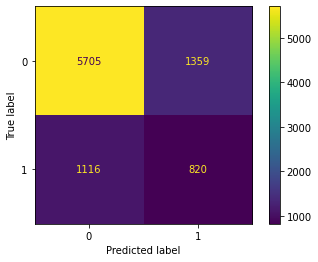

In [ ]:
# Import the modules, read the dataset and create a Pandas data frame.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
# The 'plot_confusion_matrix' function allows us to plot a confusion_matrix heatmap in one go.


cc_client_csv = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv'
df = pd.read_csv(cc_client_csv)

# Print the first five records
print(df.head(), "\n" + "-" * 100)

# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
print(df.info(), "\n" + "-" * 100)

# Rename 'PAY_0' to 'PAY_1', and 'default.payment.next.month' to 'DEFAULT'.
df.rename(columns = {"PAY_0": "PAY_1"}, inplace = True)
df.rename(columns = {"default.payment.next.month": "DEFAULT"}, inplace = True)

# Check whether the names of the two columns are changed or not.
for i in range(df.shape[1]):
  print(f"At index {i:02}, {df.columns[i]}")
print("-" * 100)

# Remove redundancy in the 'EDUCATION' column.
df.loc[df['EDUCATION'] == 0, 'EDUCATION'] = 5
df.loc[df['EDUCATION'] == 6, 'EDUCATION'] = 5

# Remove redundancy in the 'MARRIAGE' column.
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3

# Create the feature and target dataset for training and testing the model.
feature_columns = list(df.columns)
feature_columns.remove('DEFAULT')
feature_columns.remove('ID')

X = df[feature_columns]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

# Modeling a decision tree.
dtree_clf = DecisionTreeClassifier(random_state = 20)
dtree_clf.fit(X_train, y_train)
y_train_pred = dtree_clf.predict(X_train)
y_test_pred = dtree_clf.predict(X_test)

print(f"Accuracy on the train set: {metrics.accuracy_score(y_train, y_train_pred):.4f}\n")
print(f"Accuracy on the test set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

# Plot a confusion matrix and print a classification report for the test set.
plot_confusion_matrix(dtree_clf, X_test, y_test, values_format = 'd')
print(classification_report(y_test, y_test_pred))

---

#### Plot Decision Tree

The next step is to create an actual decision tree for the decision tree classifier we have built so far. This is done with the help of the `graphviz` and `sklearn.tree` Python modules.

To plot a decision tree:

- Import the following Python modules:

  ```python
  from sklearn.tree import export_graphviz
  from io import StringIO
  from IPython.display import Image  
  import pydotplus
  ```

- Create an object of the `StringIO` class and store it in a variable, say `dot_data`. The `io.StringIO` module implements a file-like class, `StringIO`, that reads and writes a string buffer (also known as memory files). Basically, it will create an empty dot file.

- Use the `export_graphviz()` function of the `sklearn.tree` module to export a decision tree in the DOT format. This function generates a `GraphViz` representation of the decision tree, which is then written into `out_file`. We will write the contents of the `out_file` to the empty dot file created above. Inside the function, pass the following inputs:

  - **`decision_tree`:** The decision tree to be exported to `GraphViz`. In this case, `dtree_clf`.

  - **`out_file`:** The handle or name of the output file. In this case, `dot_date`. If set to `None`, the result is returned as a string.

  - **`max_depth`:** It can be used to control the depth of the tree for display scaling purposes. If set to `None`, the tree is fully generated.
  
  - **`feature_names`:** It is used to label the corresponding feature names in the decision tree. If set to `None`, generic names will be used.
  
  -  **`class_names`:** Using `class_names` we can choose to display the names of target class at the *leaf nodes* in ascending numerical order. If `True`, shows a symbolic representation of the class name.

  - **`filled`:** The appearance of a decision tree can be customised using this parameter.
  
  - **`rounded`:** It is used to draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.

  You can read more about the `export_graphviz()` function from the link provided below:

  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

- Once exported, generate graphical renderings using the following steps:

  - Call the `getvalue()` function on the `dot_data` variable which is essentially an object of the `StringIO` class. The `getvalue()` function returns the entire contents of the stream

  - Pass the output of the above function as an input to the `graph_from_dot_data()` function of the `pydotplus` object. Store the output in a variable, say `graph`.

- Now we have got our decision tree. Now write it to a PNG file by calling the `write_png()` function. Pass a string followed by `.png` as an input to this function to name your PNG file. In this case, we will name our PNG file as `'Credit_Card_Tree.png'`.


In [ ]:
# Create an actual decision tree for the decision tree classifier you have built so far.
# Import the required modules.
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree = dtree_clf, out_file = dot_data, filled = True, rounded = True,
                feature_names = feature_columns, class_names = ['0', '1']
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.234732 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.234732 to fit



`Tip`: Click anywhere in the tree image click anywhere to zoom in/out the tree. But still, the complete tree is hard to visualise, especially when you are new to decision trees.

To overcome this issue, let us print only a small part of the `decision tree` for better understandability. This can be done by using the `max_depth` parameter while exporting the decision tree.

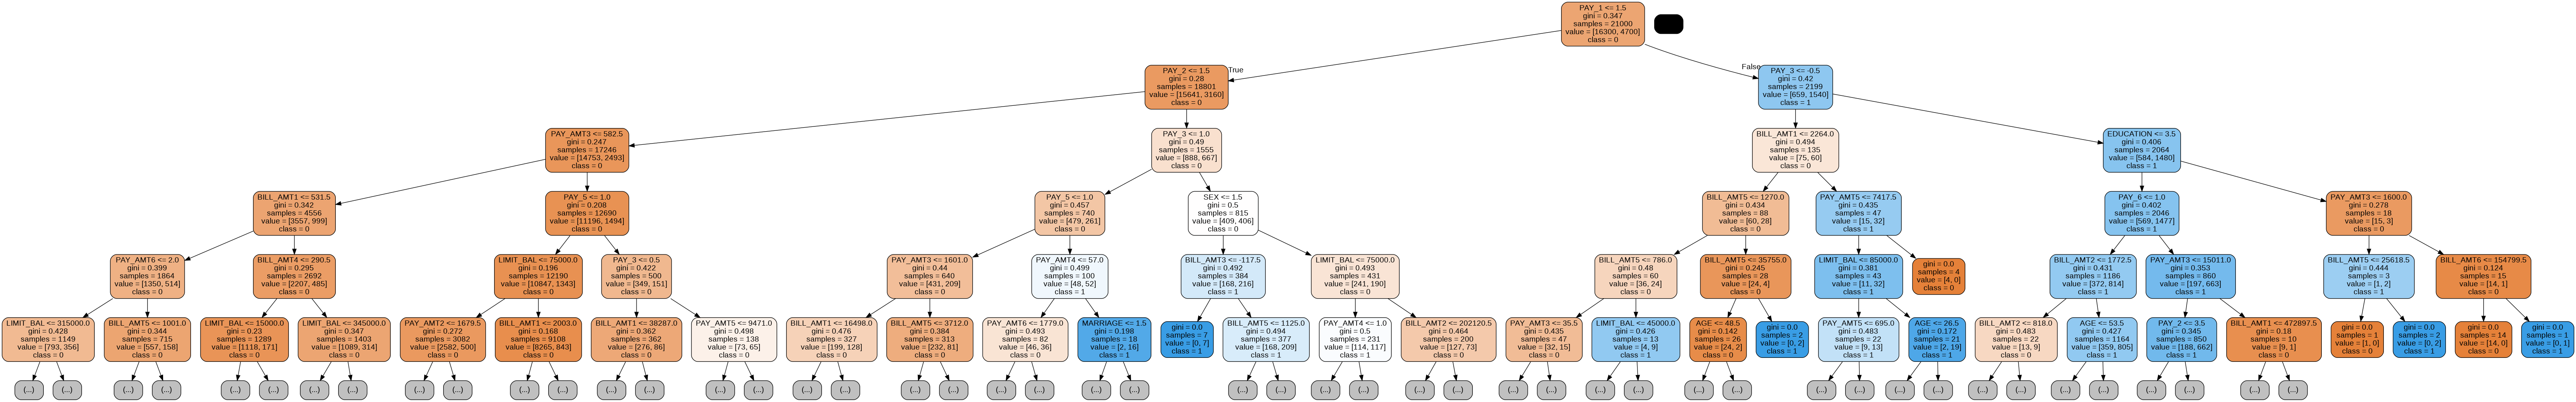

In [ ]:
# Resize the above decision tree using the 'max_depth' parameter.
dot_data = StringIO()
export_graphviz(dtree_clf, max_depth = 5, out_file = dot_data, filled = True, rounded = True,
                feature_names = feature_columns, class_names = ['0','1']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())

`Tip`: Click anywhere in the tree image to zoom in/out of the tree. The tree structure can be downloaded as a `.png` image.


---

#### Decision Tree Algorithm - Information Gain

Let's now learn another ASM technique called information gain that is meant to select the best attribute or feature to split a decision tree. However, information gain is based on the entropy of a dataset. Let us first understand the concept of entropy.


**Entropy** signifies the randomness in a dataset. It is a metric that measures impurity. A less impure node requires less information to describe it and a more impure node requires more information. Information theory is a measure to define this degree of disorganisation in a system known as entropy. If a sample is completely homogeneous (having the same type of values), then the entropy is zero and if the sample is equally divided (50—50%), it has an entropy of one. The entropy of a dataset $S$ is calculated as follows.

\begin{align}
\text{Entropy}(S) = - \sum_{i=1}^{N}p_{i} \times \log_{2}(p_{i})
\end{align}

where $p_i$ is the probability of an object classified as a class (or label).

**Information Gain (IG)** is the measurement of changes in entropy value after the splitting/segmentation of a dataset wrt on an attribute.

IG is calculated as:

\begin{align}
\text{IG} = \text{Entropy(S)} - [\text{Weighted average of Entropy of each unique value of a feature}]
\end{align}

or simply

\begin{align}
\text{IG} = \text{Entropy}(S_{b}) - \text{Entropy}(S_{a})
\end{align}

where,
- $S$ is a dataset
- $S_b$ is a dataset before split and $S_a$ is the dataset after the split

When we build a decision tree, we prefer splitting the nodes across the attribute/feature which has maximum information gain after splitting through the root node.

Once we find out the root node we proceed again with the gini index calculations for the sub-node(s) formed after splitting. This process is repeated continuously until we reach all the leaf node(s) for every possible split.

#### Decision Tree Algorithm - Information Gain Calculation

In order to better understand the steps for the formation of a decision tree, let us take yet another very small snippet from the credit card defaulter dataset and understand the process:

Gender | Education | Default
--- | --- | ---
`Male` | `Unknown` | `Yes`
`Male` | `High School` | `No`
`Female` | `High School` | `No`
`Male` | `Graduate` | `No`
`Female` | `Graduate` | `Yes`

**Note:**  The above table is a very small subset of the entire dataset, hence do not try to infer the main decision tree using this dataset.

Let us try to create a decision tree to identify credit card defaulters wrt Education and Gender.

#### Determining Root Node

There are two possibilities for root nodes: (a) Gender (b) Education

First, we will calculate the entropy of the above table. We know that entropy is given by

\begin{align}
\text{Entropy} = -\sum_{i=1}^{N}p_{i}\times \log_{2}(p_{i})
\end{align}

In the above table, we have 5 samples in total out of which 2 are defaulters and 3 non-defaulters.

Let $p_1$ and $p_2$ be the probability of defaulters and non-defaulters respectively.

- So, the probability of defaulters $p_1 = \frac{2}{5}$

- And, the probability of non-defaulters $p_2 = \frac{3}{5}$

Therefore, the entropy of the table $S$ before the split is given by

\begin{align}
\text{Entropy}(S_b) &= - (p_1 \times \log_{2}(p_1) + p_2 \times \log_{2}(p_2))
\end{align}

On substituting $p_1 = \frac{2}{5}$ and $p_2 = \frac{3}{5}$ in the above equation, we get

\begin{align}
 &= - \left( \left( \frac{2}{5}\right) \times \log_{2} \left( \frac{2}{5}\right) + \left( \frac{3}{5}\right) \times \log_{2}\left(\frac{3}{5}\right) \right) \\
 &= 0.97
\end{align}

Hence, the entropy of the table (considered for IG calculation) before the split is $0.971$

**Splitting Root Node wrt Gender**

Let us split the root node wrt the **Gender** column.

There are 3 instances of `Male` in the table. Out of them, one is a defaulter and 2 are non-defaulters.

Let $p_1$ and $p_2$ be the probabilities of `Male` defaulter(s) and `Male` non-defaulter(s) respectively.

- So, the probability of `Male` defaulters $p_1 = \frac{1}{3}$

- And, the probability of `Male` non-defaulters $p_2 = \frac{2}{3}$

Male | Defaulter | Non-defaulter
--- | --- | --- |
Count | $1$ | $2$ |
$p_i$ | $\frac{1}{3}$ | $\frac{2}{3}$ |
$$p_i \times \log_2 (p_{i})$$ | $$\frac{1}{3} \times \log_2 \left(\frac{1}{3}\right) = -0.53$$| $$\frac{2}{3} \times \log_2 \left(\frac{2}{3}\right) = -0.39$$ |

Therefore, the entropy value wrt to the `Male` instances is

\begin{align}
\text{Entropy} &= - (p_{1} \times \log_{2}(p_{1}) + p_{2}\times \log_{2}(p_{2})) \\
&= - (- 0.53  - 0.39) \\
&= 0.92
\end{align}

There are 2 instances of `Female` in the table. Out of them, one is a defaulter another is a non-defaulter.

Let $p_1$ and $p_2$ be the probabilities of `Female` defaulter(s) and `Female` non-defaulter(s) respectively.

- So, the probability of `Female` defaulters $p_1 = \frac{1}{2}$

- And, the probability of `Female` non-defaulter $p_2 = \frac{1}{2}$

Female | Defaulter | Non-defaulter
--- | --- | --- |
Count | $1$ | $1$ |
$p_{i}$ | $0.5$ | $0.5$ |
$$p_i \times \log_2 (p_{i})$$ | $$0.5 \times \log_2 (0.5) = -0.5$$| $$0.5 \times \log_2 (0.5) = -0.5$$ |

Therefore, the entropy value for the `Female` instances is

\begin{align}
\text{Entropy} &= - (p_1 \times \log_{2}(p_1) + p_2 \times \log_{2}(p_2)) \\
&= - (- 0.5 - 0.5) \\
&= 1
\end{align}

Now, let's calculate the *entropy* value after the split that *is the weighted average of the entropy values* for `Male` and `Female` instances. Its calculation process is the same as weighted gini index calculation, i.e.,

$$\text{WE} = (\text{proportion of Male instances in the Gender column}) \times (\text{Entropy of Male}) + (\text{proportion of Female instances in the Gender column}) \times (\text{Entropy of Female})$$

- The proportion of `Male` instances in the Gender column = $\frac{3}{5}$
- The proportion of `Female` instances in the Gender column = $\frac{2}{5}$

\begin{align}
\therefore \text{Entropy}(S_a) = \left(\frac{3}{5}\right)\times 0.92 + \left(\frac{2}{5}\right)\times 1 = 0.95
\end{align}

Therefore, the **Information Gain (IG)** obtained by splitting the root node wrt the Gender column is:

\begin{align}
\text{IG} &= \text{Entropy}(S_{b}) - \text{Entropy}(S_a) \\
&= 0.97 - 0.95 \\
&= 0.02
\end{align}

Hence, the information gain is $0.02$ (almost nil) if we use the root node as Gender and perform a split.

**Splitting Root Node wrt Education**

Let us split the root node wrt the **Education** column.

There is 1 instance of `Unknown` in the table and it is a defaulter.

Let $p_1$ and $p_2$ be the probabilities of `Unknown` defaulter(s) and `Unknown` non-defaulter(s) respectively.

- So, the probability of `Unknown` defaulters $p_1 = \frac{1}{1} = 1$

- And, the probability of `Unknown` non-defaulter $p_2 = \frac{0}{1} = 0$

Unknown | Defaulter | Non-defaulter
--- | --- | --- |
Count | $1$ | $0$ |
$p_i$ | $1$ | $0$ |
$$p_i \times \log(p_i)$$ | $$1 \times \log_2 (1) = 0$$ | $$0 \times \log_2 (0) = 0$$ |

Hence, the entropy value for the `Unknown` instances will be $0$.

There are 2 instances of `Graduate` in the table. One of them is a defaulter and another is a non-defaulter.

Let $p_1$ and $p_2$ be the probabilities of `Graduate` defaulter(s) and `Graduate` non-defaulter(s) respectively.

- So, the probability of `Graduate` defaulters $p_1 = \frac{1}{2}$

- And, the probability of `Graduate` non-defaulter $p_2 = \frac{1}{2}$

Graduate | Defaulter | Non-defaulter
--- | --- | --- |
Count | $1$ | $1$ |
$p_{i}$ | $0.5$ | $0.5$ |
$$p_i \times \log_2 (p_{i})$$ | $$0.5 \times \log_2 (0.5) = -0.5$$ | $$0.5 \times \log_2 (0.5) = -0.5$$ |

Therefore, the entropy value for `Graduate` instances is

\begin{align}
\text{Entropy} &= - (p_1 \times \log_{2}(p_1) + p_2 \times \log_{2}(p_2)) \\
&= - (- 0.5 - 0.5) \\
&= 1
\end{align}

There are 2 instances of `High School` in the table. Both of them are non-defaulters.

Let $p_1$ and $p_2$ be the probabilities of `High School` defaulter(s) and `High School` non-defaulter(s) respectively.

- So, the probability of `High School` defaulters $p_1 = \frac{0}{2} = 0$

- And, the probability of `High School` non-defaulter $p_2 = \frac{2}{2} = 1$

High School | Defaulter | Non-defaulter
--- | --- | --- |
Count | $0$ | $2$ |
$p_{i}$ | $0$ | $1$ |
$$p_i \times \log_2 (p_{i})$$ | $$0 \times \log_2 (0) = 0$$| $$1 \times \log_2 (1) = 0$$ |

Therefore, the entropy value for `High School` instances is $0$

Hence, Entropy after split wrt the Education column is:
\begin{align}
\text{Entropy}(S_a) &=  \left(\frac{1}{5}\right)\times 0 + \left(\frac{2}{5}\right)\times 1 + \left(\frac{2}{5}\right)\times 0 \\
&= 0.4
\end{align}

Information Gain obtained splitting the root node wrt the Education columns is
\begin{align}
\text{IG} &= \text{Entropy}(S_b) - \text{Entropy}(S_a) \\
&= 0.97 - 0.4 \\
&= 0.57
\end{align}

Hence, the information gain is $0.57$ if we use the root node as Education and perform a split.

*Since the information gain (IG) obtained from the Education column split ($0.57$) is greater than the IG obtained from the Gender column split ($0.02$), we choose the Education column as our Root Node.*

---

#### Decision Tree Creation

Let us again revisit the original dataset, take a small subset of the dataset, and manually build a decision tree without using the `sklearn` module.

As we saw in the correlation matrix, defaulter status depends on few features compared to others. Let us create a smaller dataset by having only the following features to the new dataset:

`['EDUCATION', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']`

Also, out of 30,000 samples (or rows), let's take only 24 samples randomly from the original data frame. To do this, use the `sample()` function of the `pandas` module. Its **syntax** is:

> `data_frame.sampe(n, random_state)`

where `n` is the number of samples to be taken and `random_state` allows you to take the same sample randomly when set to an integer value.

In [ ]:
# New smaller data frame from the original data frame.
new_df = df[['EDUCATION', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DEFAULT']].sample(n = 24, random_state = 5)
print(f"Number of rows = {new_df.shape[0]}\nNumber of cols = {new_df.shape[1]}\n")
new_df.head()

Number of rows = 24
Number of cols = 9



EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
8033           2    1      0      0     -1      0      0     -1        0
29952          2    1     -1     -1     -1     -1      0     -1        0
2736           2    2      0      0      0      0      0      0        0
29677          2    1      0      0     -2     -2     -1      0        0
3285           1    1      0      0      0      0      2      0        0

**Algorithmic Approach**

Since we are not using the `sklearn` module to build a decision tree, we have to do the following to do the same manually:

1. Compute entropy for a dataset using the following result.

\begin{align}
\text{Entropy} = -\sum_{i=1}^{N}p_i \times \log_{2}(p_i)
\end{align}

2. For each attribute/feature:
  - calculate entropy for all categorical values
  - calculate the weighted average of the entropy values for the current attribute
  - calculate information gain (IG) for the current attribute

3. Choose the feature/attribute having the greatest IG value to split the root node.

4. Repeat the splitting process until we get pure nodes (all leaf nodes).

Now let's define a Python function, say `compute_entropy()`, that takes a data frame as an input and returns the entropy value as an output. Inside the function:

- Get the target variable values from the new small data frame.

- Declare a new variable, say `entropy` and set its value equal to 0.

- Determine the unique values of the target variable. In our case, 0 and 1.

- For all the unique values, calculate entropy using a `for` loop. Inside the `for` loop:

  - Calculate the probability of an event, say `i` as per the entropy formula
  
  - Calculate the entropy values

- Finally, return the value of entropy.

In [ ]:
# A function that takes a data frame as an input and returns entropy value as an output.
def entropy_before_split(new_df):
    target_col_name = new_df.columns[-1]
    entropy = 0
    unique_values = new_df[target_col_name].unique()
    for value in unique_values:
        probability_i = new_df[target_col_name].value_counts()[value] / len(new_df[target_col_name])
        entropy += -probability_i * np.log2(probability_i)
    return entropy

The next step is to compute **entropy after** the **split**, i.e., the entropy of a feature variable (or weighted entropy of the unique values of a feature) in the `new_df` data frame after splitting the root node.

For this, we need to define another function, say `entropy_after_split()`. It should take `new_df` and a feature of `new_df` as inputs and return the weighted entropy for a feature after the split. Inside the function:

- Get the target variable from a data frame.

- Determine the unique values of each feature (`'PAY_1'`, `'PAY_2'` etc.)

- Declare a new variable, say `weighted_entropy` and set it equal to 0 initially. It will eventually store the weighted entropy value for a feature.

- Loop through all the unique values of a feature using a `for` loop. Inside the loop:

  - Define a new variable, say `entropy_of_feat_uniq_val` and set it equal to 0 initially. It will eventually store the entropy of a unique value of a feature variable.

  - Loop through the unique values of the target variable that are available for a feature variable. Inside the inner `for` loop.

    - Calculate the probability of a unique value of a feature variable

    - Calculate the corresponding entropy by multiplying the probability value (obtained in the above step) with its logarithm (at base 2) value, i.e., $-p_i \times \log_{2}(p_i)$

  - Exit the inner `for` loop and inside the outer `for` loop, calculate the proportion of a unique value in the feature.

  - Calculate the weighted entropy value of a feature by computing the weighted average of the individual entropy values of each unique value.

- Return the weighted entropy value.

In [ ]:
# A function to calculate the entropy after splitting the value for a feature.
def entropy_after_split(new_df, feature):
  target_col_name = new_df.columns[-1]
  feature_unique_values = new_df[feature].unique()
  weighted_entropy = 0
  for feat_uniq_val in feature_unique_values:
      entropy_of_feat_uniq_val = 0 # To store the entropy value of a unique value of a feature variable.
      corres_avail_target_val = new_df.loc[new_df[feature] == feat_uniq_val, target_col_name].value_counts().index.values
      for val in corres_avail_target_val:
          prob_val = new_df[new_df[feature] == feat_uniq_val][target_col_name].value_counts()[val] / new_df.shape[0]
          entropy_of_feat_uniq_val += - prob_val * np.log2(prob_val)
      prop_of_feat_uniq_val = new_df[new_df[feature] == feat_uniq_val].shape[0] / new_df.shape[0]
      weighted_entropy += prop_of_feat_uniq_val * entropy_of_feat_uniq_val
  return weighted_entropy

Now let's define a function to calculate the information gain (IG) to split a root node. Let's call it `root_node_attribute()` function. This function takes a data frame as an input and returns the node having the greatest information gain value. Inside the function:

- Create empty lists to store entropy and information gain for respective nodes

- Use `for` loop to obtain entropy and information gain for all the features set in data frame. Inside for loop:

  - Get entropy and information gain only for feature columns

  - Find the entropy after split wrt features and append to `entropies_list` using the `append()` method

  - Obtain the information gain using the formula $\text{IG} = E_b - E_a$ wrt features and append to the `info_gain_list` using the `append()` method

- Finally, return the feature having the greatest information gain value.


In [ ]:
# A function to calculate the Information Gain for split operation.
def root_node_attribute(new_df):
    entropies_list = []
    info_gain_list = []
    for feature in new_df.columns[:-1]:
        entropies_list.append(entropy_after_split(new_df, feature))
        info_gain_list.append(entropy_before_split(new_df) - entropy_after_split(new_df, feature))
    return new_df.columns[:-1][np.argmax(info_gain_list)]

# Find out the attribute (or feature) to split the root node.
root_node_att = root_node_attribute(new_df)
root_node_att

'PAY_1'

Let us now define a function, say `get_subtable()` to obtain the number of samples in a decision node. This function we will take:

- `new_df`, `node`, and `value` as inputs

- Return the rows having unique values of a feature

- Use the `reset_index()` method to reset the index numbering for rows returned by the `get_subtable()` function

In [ ]:
# A function that returns a sub-table of the 'new_df' data frame.
def get_subtable(new_df, node, value):
    return new_df[new_df[node] == value].reset_index(drop = True)

# A new data frame that is a subtable of 'new_df' having only -1 values in the 'PAY_1' column and reset the index.
subtable = get_subtable(new_df, 'PAY_1', -1)
subtable

EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
0          2    1     -1     -1     -1     -1      0     -1        0
1          1    2     -1     -1     -1     -2     -1     -1        0
2          1    1     -1     -1     -1     -1     -1     -1        0
3          1    2     -1      0      0      0      0      0        0
4          2    2     -1     -1     -1      0      0      0        1

If we look at the `PAY_1` column the values for each row `is equal to -1`. The rows order begin from $0, 1, 2 \dots$

<br>

It is time to put together everything we have done so far and construct the decision tree. The final step is to create a function to build the decision tree. For this, define a function `build_tree()`. It should take `new_df` data frame, empty `tree` as inputs and return the resulting decision tree (a Python dictionary) as an output. Inside the function:
  
- Define the `target` variable and store the `DEFAULT` column name in it.
  
- Declare a variable `node` and set it equal to the root node attribute returned by the `root_node_attribute()` function.

-  Declare a variable `att_value` and set it equal to the `unique` labels from the target set. This `att_value` will be used to split the decision nodes.

- Check `if tree = None`. Inside the `if` block:

    - Create an empty dictionary `tree = {}`.

    - Assign an empty dictionary as a corresponding value to the `node` returned by `root_node_attribute()` function.

- Use a `for` loop to iterate through each value stored in the `att_value` array. Inside the loop:

  - Declare a new variable `subtable`. Call the `subtable()` function which returns the rows of a dataset for the root `node`.

  - Declare a variable `target_labels` that stores the unique target values.

  - Declare a variable `counts` which represents the repetitions of the target having the unique `target_labels` for the respective feature.

  - To identify the node as a leaf node, check the length of `counts` returned for unique values of the target set using an `if` statement.

    - If the `len(counts) == 1` it means there is only one unique target value in the respective node. This node will become a leaf node and display the number of the target occurring in the `target_labels`.

    - Else the node becomes a decision node and splits the node further using the `build_tree()` function by passing `subtable` as an input to the function.

- Return the `tree` dictionary.

In [ ]:
# The 'build_tree()' function to build a decision tree.
def build_tree(new_df, tree = None):
    target = 'DEFAULT'
    node = root_node_attribute(new_df)
    att_value = np.unique(new_df[node])

    if tree is None:
        tree = {}
        tree[node] = {}

    for value in att_value:
        subtable = get_subtable(new_df, node, value)
        target_labels, counts = np.unique(subtable[target], return_counts = True)
        if len(counts) == 1:
            tree[node][value] = target_labels[0]
        else:
            tree[node][value] = build_tree(subtable)

    return tree

In the above code:

-  `new_df` is the reduced dataset we have obtained from the original credit card default dataset.

- We pass parameter `tree = None` in the function argument to provide a default value and to avoid any `TypeError` occurrence.

- Assign the `'DEFAULT'` column name to `target` variable for recursive use in the `build_tree()` function.

- `node = root_node_attribute(new_df)` will return the node with having the greatest information gain value.

  - For the first occurrence, the `node` variable will contain the root node.

  - This function will be used recursively. Hence, once we receive a decision node from `root_node_attribute()` function and if the node is impure the `build_tree(subtable)` inside the `if len(counts) == 1` will return the node with the highest information gain among the remaining nodes.

  - With each recursive call for this function inside the `if len(counts) == 1` the number of features for which $IG$ is calculated will reduce.

- `att_value = np.unique(new_df[node])` will return the list of unique values in the `node` column. Eg. for node `PAY_1` the `att_value` will be:

  ```
  array([-2, -1,  0,  1,  2,  3])
  ```

- Since `tree` is `None`, the `if tree is None` will return `True` condition. Inside the conditional block:

  - `tree = {}` creates an empty dictionary.

  - `tree[node] = {}` adds the dictionary elements with respect to `node` returned by the `root_node_attribute()` function as `key`. This is done inside the `tree` dictionary.

    Eg. for the root node we have `PAY_1`. Hence, `tree[node] = {}` will create a nested dictionary and returns:

    `{'PAY_1': {}}`

    - This indicates that we now have `PAY_1` as our root node and will be split to get the next decision nodes.
    
    - The decision nodes which will further be defined with `get_subtable()` function, will again be a dictionary and the process will continue until we reach the leaf nodes.

- `for value in att_value:` we will loop through all unique values of feature returned by `root_node_attribute()` function.

- For eg. for root node we have: `node = 'PAY_1'`. For this node the unique values in the column can be returned by: `np.unique(new_df['PAY_1'])`. This returns a list: for `att_value`

  `[-2 -1  0  1  2  3]`

- In the `for` loop, we will iterate through different values of the `att_value' list:

  - `subtable = get_subtable(new_df, node, value)` will return the rows for unique `value` obtained from `att_value`. Eg. for a random unique value of say `PAY_1 = 2` the subtable will return:

    ```
        EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
    0       2    1      2      2      7      7      7      7        1
    1       1    2      2      2      7      7      7      7        0
    ```

  - `target_labels, counts = np.unique(subtable[target], return_counts = True)` will return two lists: `target_labels` and '`counts` for each feature.

    `target_labels` will consist of the unique values found in the `DEFAULT` column for unique value' of the respective `node`. Eg. For root node, `node = 'PAY_1'` and for unique value of `PAY_1 = 2` from above subtable, we have both `defaulter` and `non-defaulter` for target in the subtable, hence  the `target_labels` will contain the `[0 1]` array.
    
    `counts` will return the number of instances for each `target_labels` in the respective subtable. For eg. for root node `node = 'PAY_1'` and for unique value of `PAY_1 = 2` from above subtable, we have 1 case for `defaulter` and 1 case for `non-defaulter`. Hence `counts` will contain the `[1 1]` array.

  - This process will continue for all the unique values for `node = 'PAY_1'` until we arrive at the next decision node or we achieve a leaf node

  - The condition for decision node or leaf node will be checked inside the `if` statement:

    - `if len(counts) == 1` indicates that there is only 1 unique value in the subtable which means the node is pure.

      - If the node is pure, then `tree[node][value] = target_labels[0]`  will return the nested dictionary with the root node as `node`, the `value` of the `node` as a key and `counts` of unique `value`.
      
        Eg., for root node `PAY_1`, unique `value = -2` the subtable will be:
      
      ```
           EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
        0    2    1     -2     -2     -2     -2     -2     -1        0
        1    1    1     -2     -2     -2     -1     -1      0        0
      ```
      - This subtable satisfies the condition `if len(counts) == 1`. If there were no further decision nodes further we would get:

        `{'PAY_1': {-2: 2}}`

    - The `else` statement signifies that for all other values when `len(counts) == 1` is not `True` the node will be split further using the `build_treee(subtable)` function.

      - In the above `build_tree()` function, do not pass `new_df` as input instead pass `subtable` data frame as an input because the `node` is being analysed for a further split. In our case, `PAY_1` is the root node that is being analysed for a further split.

  - The entire process is repeated for all the unique `values` and for all decision nodes until all the nodes obtained through the `if` statement are leaf nodes.

- The function finally returns the `tree` as a nested dictionary.

<br>

Let us look at the subtable for each root node.

In [ ]:
# Print root node, the unique values for it and corresponding sub-table for each unique attribute value.
node = root_node_attribute(new_df)
att_value = np.unique(new_df[node])
target = 'DEFAULT'

print(f"Root node ==> {node}\n")
print(f"Attribute unique values ==> {att_value}\n")

for value in att_value:
    subtable = get_subtable(new_df, node, value)
    target_labels, counts = np.unique(subtable[target], return_counts = True)
    print(f"\nSubtable for Attribute Value {value}\n\n{subtable}") # Correspondng sub-table for each unique attribute value.
    print(f"\nTarget labels: {target_labels}") # Corresponding target labels for each unique attribute value.
    print(f"Corresponding counts: {counts}\n{'-' * 75}") # Corresponding counts for each label

Root node ==> PAY_1

Attribute unique values ==> [-2 -1  0  1  2  3]


Subtable for Attribute Value -2

   EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
0          2    1     -2     -2     -2     -2     -2     -1        0
1          1    1     -2     -2     -2     -1     -1      0        0

Target labels: [0]
Corresponding counts: [2]
---------------------------------------------------------------------------

Subtable for Attribute Value -1

   EDUCATION  SEX  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  DEFAULT
0          2    1     -1     -1     -1     -1      0     -1        0
1          1    2     -1     -1     -1     -2     -1     -1        0
2          1    1     -1     -1     -1     -1     -1     -1        0
3          1    2     -1      0      0      0      0      0        0
4          2    2     -1     -1     -1      0      0      0        1

Target labels: [0 1]
Corresponding counts: [4 1]
---------------------------------------------------------------------

---

#### Activity 1: Construct Decision Tree

Now it is time to build the tree using the `build_tree()` function.

- Construct and store the decision tree to a variable tree

- Print the `tree`

In [ ]:
# S1.1: Construct and print the decision tree
build_tree = build_tree(new_df)
build_tree

{'PAY_1': {-2: 0,
  -1: {'EDUCATION': {1: 0, 2: {'SEX': {1: 0, 2: 1}}}},
  0: {'PAY_3': {-2: 0, -1: 0, 0: 0, 2: 1}},
  1: 1,
  2: {'EDUCATION': {1: 0, 2: 1}},
  3: 1}}

We will explore and understand the decision tree after we plot the decision tree with scikit learn libraries too.

Now let's obtain the decision tree for the same dataset using scikit learn library. Model the decision tree using scikit learn libraries:

- First, separate the `features` and `label` from `new_df` data frame

- Next, split the data frame into train and test sets.

- Create an object (say `dtree_scikit`) of the `DecisionTreeClassifier()` constructor.

- Call the `fit()` function on the above constructor with train features and target variables as inputs.

- Get the predicted target values for both train and test sets by calling the `predict()` function on `dtree_scikit`

- Plot the confusion matrix for the test data using the `plot_confusion _matrix()` function on the `metrics` object. Display the values in the confusion matrix as integers.

- Get the accuracy score by calling the `accuracy_score()` function on the `metrics` object.

- Get the precision, recall and f1-scores by calling the `classification_report()` function on the `metrics` object.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


1.0
0.875
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.50      1.00      0.67         1

    accuracy                           0.88         8
   macro avg       0.75      0.93      0.79         8
weighted avg       0.94      0.88      0.89         8



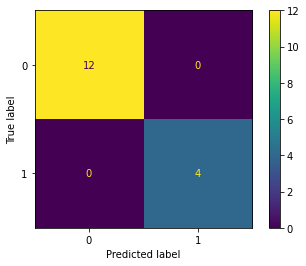

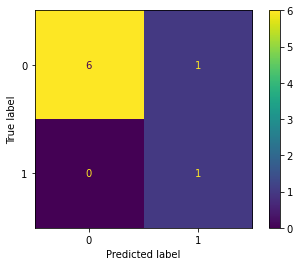

In [ ]:
# S1.2: Model the decision tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
X = new_df.iloc[:,:-1]
y = new_df['DEFAULT']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 8)

d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
pred_train = d_tree.predict(X_train)
pred_test = d_tree.predict(X_test)
plot_confusion_matrix(d_tree,X_train,y_train)
plot_confusion_matrix(d_tree,X_test,y_test)

print(metrics.accuracy_score(y_train,pred_train))
print(metrics.accuracy_score(y_test,pred_test))

print(classification_report(y_test,pred_test))

Plot the decision tree.

- Create an object of the `StringIO` class and store it in a variable, say `dot_data`. The `io.StringIO` module implements a file-like class, `StringIO`, that reads and writes a string buffer (also known as memory files). Basically, it will create an empty dot file.

- Use the `export_graphviz()` function of the `sklearn.tree` module to export a decision tree in the DOT format. This function generates a `GraphViz` representation of the decision tree, which is then written into `out_file`. We will write the contents of the `out_file` to the empty dot file created above. Inside the function, pass the following inputs:

  - **`decision_tree`:** The decision tree to be exported to `GraphViz`. In this case, `y_test_pred`.

  - **`out_file`:** The handle or name of the output file. In this case, `dot_date`. If set to `None`, the result is returned as a string.

  - **`max_depth`:** It can be used to control the depth of the tree for display scaling purposes. If set to `None`, the tree is fully generated.
  
  - **`feature_names`:** It is used to label the corresponding feature names in the decision tree. If set to `None`, generic names will be used.
  
  -  **`class_names`:** Using `class_names` we can choose to display the names of target class at the *leaf nodes* in ascending numerical order. If `True`, shows a symbolic representation of the class name.

  - **`filled`:** The appearance of a decision tree can be customised using this parameter.
  
  - **`rounded`:** It is used to draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.

  You can read more about the `export_graphviz()` function from the link provided below:

  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

- Once exported, generate graphical renderings using the following steps:

  - Call the `getvalue()` function on the `dot_data` variable which is an object of the `StringIO` class. The `getvalue()` function returns the entire contents of the stream

  - Pass the output of the above function as an input to the `graph_from_dot_data()` function of the `pydotplus` object. Store the output in a variable, say `graph`.

- Now we have got our decision tree. Now write it to a PNG file by calling the `write_png()` function. Pass a string followed by `.png` as an input to this function to name your PNG file. In this case, we will name our PNG file as `'Credit_Card_Tree.png'`.


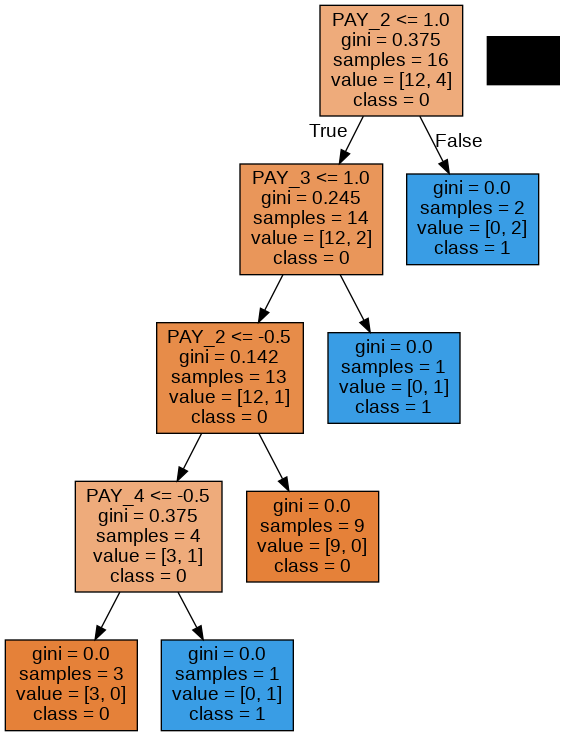

In [ ]:
# S1.3 Print the decision tree
from sklearn.tree import export_graphviz
string_io = StringIO()
export_graphviz(decision_tree = d_tree,out_file = string_io,filled = True,feature_names=X.columns,class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(string_io.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

If you observe the decision tree, the root node is `PAY_1`.


**Splitting on the left-hand side of the root node (`True`)**

The root node is split using the condition, `if PAY_1 <= 0.5`  which means a customer should have paid the bill for September 2005 on time. The root node has a gini index of `0.375`, total `samples = 16`, with a distribution of values `12` and `4` in the target classes `0` (means non-defaulter) and `1`(means defaulter) respectively. As the majority of samples belong to `class 0` this can be labelled as a `non-defaulter` node.

- If the `PAY_1 <= 0.5` condition is `True`, the customer payment status for `PAY_3` i.e. July 2005 bill payment is analysed. This decision node is split using the condition `if PAY_3 <= 1.0` which means the customer should not have delayed the payment for the July 2005 bill by more than one month.

  - If the `PAY_3 <= 1.0` condition is `True`, the customer payment status for `PAY_2` is analysed. This decision node is splitted using the condition if `PAY_2 <= -0.5` which means the payment for August 2005 should have been made on time. `14` out of `16 samples` have been passed on to this condition with a distribution of values of `12` and `2` in the target class. As the majority of samples belong to `class 0` this can be labelled as a `non-defaulter` node.

    - If the `PAY_2 <= -0.5` condition is `True`, the customer payment status for `SEX` is analysed.

This process continues until the last leaf node is obtained.

**Splitting on the right-hand side of the root node (`False`)**

- If the `PAY_1 <= 0.5` condition is `False`, we arrive at a leaf node with target label distribution `value = [0, 2]`. As the majority of samples belong to `class 1` this can be labelled as a `defaulter` leaf node.

Let us revisit the tree determined by the `build_tree()` function.

`
{'PAY_1': {-2: 0, -1: {'EDUCATION': {1: 0, 2: {'SEX': {1: 0, 2: 1}}}}, 0: {'PAY_3': {-2: 0, -1: 0, 0: 0, 2: 1}}, 1: 1, 2: {'EDUCATION': {1: 0, 2: 1}}, 3: 1}}
`
The above `tree dictionary` can now be redrawn as:

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/decision-tree-final.png">

Now compare the above tree with the standard decision tree representation.

**Question**

The tree structure obtained manually and using the `sklearn` module doesn't appear to be the same. Any guesses why?

**Answer**

Since we have split the dataset into train and test in a small dataset, we are here losing some values and depending on the chunk of the dataset reserved for training the numbers of target columns distribution will vary. Hence, the tree structure might vary. The differences in both the tree structures would not be huge and will vary only by a single node.

Moreover, we have not optimised the decision tree, hence `sklearn` will apply its own optimisation techniques within the `DecisionTreeClassifier`.

---

#### Decision Tree Hyperparamteres

A *hyperparameter* is used to alter the structure/learning of a machine learning algorithm. These are the parameters that refer to model selection and improving the performance of the model.

- When building a Decision Tree, tuning hyperparameters is a crucial step in building the most accurate model.

- It is not always necessary to tune every hyperparameter, but it is important to adjust certain ones so that you can improve your overall model.

As per **scikit learn**:

> `class sklearn.tree.DecisionTreeClassifier(criterion, max_depth, min_samples_split, min_samples_leaf)`

Parameters:

- **`criterion`**: string - {'gini', 'entropy'}

By default the algorithm is based on 'gini index' calculations for splitting. It can be changed to split based on information gain the criterion using  'entropy'.

- **`max_depth`**: integer, default=None

To reduce the complexity and processing time we can determine the maximum depth of tree. None implies that the tree will be splitted and expanded until all leaves are pure nodes.

- **`min_samples_split`**: integer,float, default=2

The minimum samples are required to split an internal node. If the amount of sample in an internal node is less than the min_samples_split, then that node will become a leaf node. If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is considered as a fraction.

- **`min_samples_leaf`**: integer, float, default=1

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

- **`random_state`**: int, default=None

Controls the randomness of the estimator. It is used, if you want consistent results everytime you run the classifier.

You can read more about decision tree hyperparameters by clicking on the link provided below:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

#### Activity 2: Pruning the Decision Tree

Pruning is performed to reduce the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.
For pruning

- Create an empty list `depth_accuracy` to store the accuracy score for various `depth` field.

- For Pruning the decision tree loop through `range(1,21)`. Inside the loop:

  - Create an object (`dtree_pruned_clf`) of the `DecisionTreeClassifier` class and pass `max_depth = i` as an argument to the constructor.

  - call the `fit()` function on the above constructor, with train features and target variables as inputs.

  - Get the predicted target values for test sets by calling the predict() function on `dtree_pruned_clf`
   
  - Get the accuracy score for test sets by calling the `accuracy_score()` function on the `metrics` object for `dtree_pruned_pred` model.

    - Append the accuracy values to the `depth_accuracy` list.

- Get the best accuracy from the list `depth_accuracy` using `max()` method.

- Get the depth at `max()` accuracy field using `enumerate()` method over the list `depth`.

In [ ]:
print("A")

A


In [ ]:
# S2.1: Pruning the decision tree for various depths

# Building a decision tree model again with the original dataset.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

feature_columns = list(df.columns)
feature_columns.remove('DEFAULT')
feature_columns.remove('ID')

X = df[feature_columns]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

# ADD YOUR CODE FROM HERE.
depth_accuracy = []
for i in range(1, 21):
    dtree_pruned_clf = DecisionTreeClassifier(max_depth = i)
    dtree_pruned_clf.fit(X_train, y_train)
    dtree_pruned_pred = dtree_pruned_clf.predict(X_test)
    depth_accuracy.append(metrics.accuracy_score(y_test, dtree_pruned_pred))
    print("Accuracy when max_depth = {0} is {1:.3f}".format(i, metrics.accuracy_score(y_test, dtree_pruned_pred)))

m = max(depth_accuracy)
print("\nThe max accuracy is {0:.3f} when max_depth = {1}".format(max(depth_accuracy), [i + 1 for i, j in enumerate(depth_accuracy) if j == m]))

Accuracy when max_depth = 1 is 0.823
Accuracy when max_depth = 2 is 0.823
Accuracy when max_depth = 3 is 0.824
Accuracy when max_depth = 4 is 0.822
Accuracy when max_depth = 5 is 0.818
Accuracy when max_depth = 6 is 0.819
Accuracy when max_depth = 7 is 0.816
Accuracy when max_depth = 8 is 0.813
Accuracy when max_depth = 9 is 0.812
Accuracy when max_depth = 10 is 0.806
Accuracy when max_depth = 11 is 0.805
Accuracy when max_depth = 12 is 0.800
Accuracy when max_depth = 13 is 0.797
Accuracy when max_depth = 14 is 0.788
Accuracy when max_depth = 15 is 0.785
Accuracy when max_depth = 16 is 0.778
Accuracy when max_depth = 17 is 0.774
Accuracy when max_depth = 18 is 0.770
Accuracy when max_depth = 19 is 0.765
Accuracy when max_depth = 20 is 0.757

The max accuracy is 0.824 when max_depth = [3]


In above code:

- Inside the `for` loop:

 - `dtree_pruned_clf = DecisionTreeClassifier(max_depth = i)` will construct decision trees of different depth `for` various values of `i`.

- `m = max(depth_accuracy)` will save the highest accuracy value achieved.

- The enumerate function returns the index of the list along with the value. Here, when we give the condition `if j == m` the `[i + 1 for i, j in enumerate(depth_accuracy)` will return the depth of the tree at maximum accuracy `m` which is indicated by the list index.

<br>

Now we have a decision tree with maximum accuracy. Let us build the tree model with the `max_depth` and visualise the tree:

- Use `DescisionTreeClassifier(max_depth = 3)` constructor for and name the model as: `dtree_clf3` to indicate depth of the tree. Set `random_state = 20` for consistent results

- Call the `fit()` function on the above constructor, with train features and target variables as inputs.

- Get the predicted target values for test sets by calling the `predict()` function on `dtree_clf3`

- Get the accuracy score for test set by calling the `accuracy_score()` function on the `metrics` object for `dtree_pred_clf3` model.

In [ ]:
# S2.2: Modeling the pruned decision tree
d_tree_clf3 = DecisionTreeClassifier(max_depth = 3,random_state = 20)
d_tree_clf3.fit(X_train,y_train)
pred_test = d_tree_clf3.predict(X_test)
pred_train = d_tree_clf3.predict(X_train)
print("Train accuracy :",metrics.accuracy_score(y_train,pred_train))
print("Test accuracy :",metrics.accuracy_score(y_test,pred_test))

Train accuracy : 0.9375
Test accuracy : 0.875


Now, let's visualise the pruned decision tree. To do this:

- Import the following libraries:

  ```python
  from sklearn.tree import export_graphviz
  from io import StringIO
  from IPython.display import Image  
  import pydotplus
  ```

- Create an object of the `StringIO` class and store it in a variable say `dot_data`.

- Use the `export_gaphviz()` function of the `sklearn.tree` module to export a decision tree in the DOT format.

  - **`decision_tree`:** The decision tree to be exported to `GraphViz`. In this case, `dtree_clf3`.

  - **`out_file`:** The handle or name of the output file. Set `out_file = dot_date`.
  
  - **`feature_names`:** It is used to label the corresponding feature names in the decision tree. Set `feature_names = feature_columns`
  
  -  **`class_names`:** Set `class_names=['0','1']` to display the class at various nodes.

  - **`filled`:** The appearance of a decision tree can be customised using this parameter. Set `filled = True`
  
  - **`rounded`:** It is used to draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman. Set `rounded = True`

  You can read more about the `export_graphviz()` function from the link provided below:

  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

- Once exported, generate graphical renderings using the following steps:

  - Call the `getvalue()` function on the `dot_data` variable which is essentially an object of the `StringIO` class. The `getvalue()` function returns the entire contents of the stream

  - Pass the output of the above function as an input to the `graph_from_dot_data()` function of the `pydotplus` object. Store the output in a variable, say `graph`.

- Now we have got our decision tree. Now write it to a PNG file by calling the `write_png()` function. Pass a string followed by `.png` as an input to this function to name your PNG file. Set filename as `'Credit_Card_Tree.png'`.

In [ ]:
y.value_counts()

0    19
1     5
Name: DEFAULT, dtype: int64

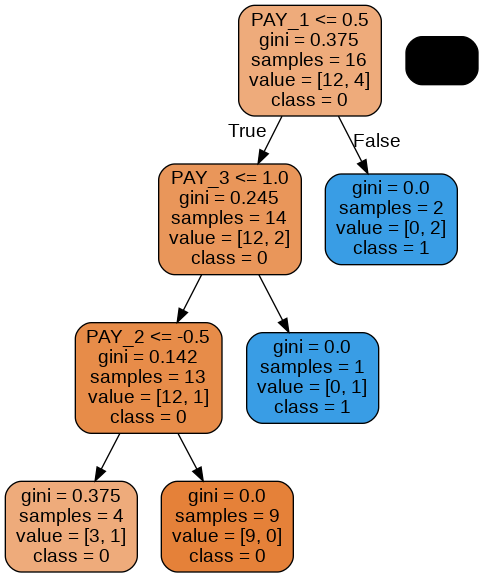

In [ ]:
# S2.3: Print the pruned decision tree.
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree = d_tree_clf3,out_file = dot_data,filled = True,feature_names = X.columns,class_names = ['0','1'],rounded = True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png('Dot.png')
Image(graph2.create_png())

If you observe the decision tree, the `root node` is **`PAY_1`** as speculated earlier (from the correlation matrix).

**Splitting on the left of the root node**

The root node is splitted using condition  `if PAY_1 <=1.5`  which means a customer should not have delayed the payment for September 2005 bill by more than one month. The root node has gini index  of `gini = 0.347`, total `samples = 21000`, with distribution of `value = [16300, 4700]` in target class `0: non-defaulter` and `1: defaulter` respectively.

- If the **`PAY_1 <=1.5`** condition is `True`, the customer payment status for `PAY_2` i.e. previous month bill payment is analysed. This decision node is splitted using condition `if PAY_2 <= 1.5` which means the customer should not have delayed the payment for the August 2005 bill by more than one month.

  - If the **`PAY_2<=1.5`** condition is `True`, the payment amount for `July 2005` is analyzed. This decision node is splitted using `if PAY_AMT3<=582.5` which means the payment made for the July 2005 is less than or equal to 582.5 NT Dollars. As the tree is pruned this will now split into leaf nodes.
   
    - If the **`PAY_AMT3<=582.5`** condition is `True`, we arrive at a leaf node with target label distribution as: `value = [3557, 999]` and as the majority samples belong to `class 0` this is a `non-defaulter` leaf node.
    
    - Else if the **`PAY_AMT3<=582.5`** condition is `False`, we arrive at a leaf node with target label distribution as `value = [11196, 1494]` and as the majority samples belong to `class 0` this is a `non-defaulter` leaf node.
  
  - Else if the **`PAY_2<=1.5`** condition is `False`, the payment status for `PAY_3<=1.0` is analyzed which means if payment for July 2005 should not have been delayed by more than one month.
   
    - If the **`PAY_3<=1.0`** condition is `True`, we arrive at at a leaf node with target label distribution as `values = [479,261]` and as the majority samples belong to `class 0` this is a `non-defaulter` leaf node.
    
    - If the **`PAY_3<=1.0`** condition is `False`, we arrive at a leaf node with target label distribution as `value = [409, 406]` and as the majority samples belong to `class 0` this is a `non-defaulter` leaf node.

**Splitting on the right of the root node**

- If the **`PAY_1 <=1.5`** condition is `False`, the customer payment status for `PAY_3` i.e. payment status for July 2005 is analysed. This deicision node is splitted using condition `if PAY_3 <= -0.5` which means the customer should have paid the bill for July 2005 on time without any delay.

  - If the **`PAY_3<=-0.5`** condition is `True`, the bill amount for September 2005 is anlayzed. This decision node is splitted using condition `if BILL_AMT1 <=2264.0` which means the bill for September 2005 should be less than or equal to 2264 NT Dollars. As the tree is pruned, this will now split into leaf nodes.
    
    - If the **`BILL_AMT1 <=2264.0`** condition is `True`, we arrive at a leaf node with target label distribution as `value = [60, 28]` and as the majority samples belong to `class 0` this is a `non-defaulter` leaf node.
    
    - Else if the **`BILL_AMT1 <=2264.0`** condition is `False`, we arrive at a leaf node with target label distribution as: `value = [15, 32]` and as the majority samples belong to `class 1` this is a `defaulter` leaf node.
  
  - Else if the **`PAY_3<=-0.5`** condition is `False`, the educational status of the customer is analysed. This decision node is splitted using condition `EDUCATION<=3.5` which means the customers should have cleared either of high school, grduate school, or university. As the tree is pruned this will now split into leaf nodes.
    
    - If the **`EDUCATION<=3.5`** is `True`, we arrive at a leaf node with target label distribution as `value = [569, 1477]` and as the majority samples belong to `class 1` this is a `defaulter` leaf node.
    
    - Else if the **`EDUCATION<=3.5`** is `False`, we arrive at a leaf node with target label distribution as `value = [15, 3]` and as the majority samples belong to `class 0` this is a `non-defaulter` leaf node.

Some observations from the pruned decision tree model:

- The accuracy appears to be good at $0.824$.

- In 6 leaf nodes out of 8, the distribution of samples for target class in leaf nodes are significant, hence this may not be a very good model.

<br>


Now, let's obtain the classification report for the pruned tree model and compare the performance of the pruned classifier with unpruned classifier and check for improvement.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


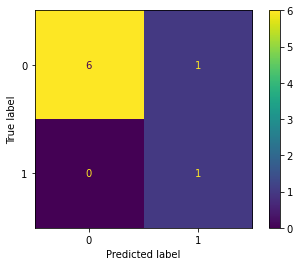

In [ ]:
# S2.4: Model evaluation for the pruned decision tree
plot_confusion_matrix(d_tree_clf3,X_test,y_test,values_format = 'd')

For pruned decision tree we have:

- `False Positive` count of 270
- `False Negative` count of 1317


---

#### Activity 3: Improving Classifier Using GridSearchCV

Q. Can we further improve the classifier performance?

Ans. Yes, we can optimise other hyperparameters as well.

Q. Which parameters will result in an optimised classifier?

Ans. We are not sure. Hence, we need to run the optimization for parameters specified in the `DecisionTreeClassifier`.

Q. Is there a faster way to do this?

Ans. Yes, Instead of using `for` loop for recursive search `scikit learn` offers a powerful tool called `GridSearchCV`

<br>

**GridSearchCV**

`GridSearchCV` is a library function that is a member of `sklearn.model_selection` package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

For detailed information: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

The `GridSearchCV` takes the following arguments:

- `estimator`: the estimator instance from scikit learn. In our case this will be `DecisionTreeClassifier()`

- `param_grid`: the dictionary object that holds the hyperparameters you want to try

- `scoring`: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric

- `cv`: number of cross-validation you have to try for each selected set of hyperparameters (default = 5)

- `verbose`: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV

- `n_jobs`: number of processes you wish to run in parallel for this task if it -1 it will use all available processors.

<br>

An important thing to note in `GridSearchCV` is **CV - Cross Validation`**.  Let us understand what is cross validation:

First let us see what is Validation:

- When we create a machine learning model, we divide the dataset into `train` and `test` dataset.

 - First we `fit` the classifier model using `train` dataset

 - Once the model has been built, we check it's perfromance using `train` dataset.

 - It is evident from the classifier models we n=have obtained so far that performance score for `train` dataset will differ from `test` dataset as our classifier model has not seen the `test` dataset so far.

 - This process is called **validation**: When we are validating (cross-check) the performance of the model using a dataset which our classifier has not seen before.

- There are a number of situations where we cannot always guarantee that the model build on train and validated on test data will be robust and perform well in real-world.

- Eg. In credit card defaulter prediction problem statement we say that despite of a huge dataset and good performance of classifier on `train data` the classifier still exhibit misclassified instances on `test data`.

To overcome this challenge `cross-validation` technique is applied. This technique ensures that the classifier model is less biased and performs robustly with real-world data.

#### K fold cross validation

In `k fold cross validation` the dataset is randomly splitted into into $k$ (subsets) `folds`. For each fold in the dataset:

- Build the model on $k-1$ folds and $k^{th}$ fold is served as test dataset.

- This process is repeated $k$ times until each of the `k folds` as test dataset.

- The average of the $k$ recorded accuracy is termed as `cross-validation` accuracy and serves as a performance evaluation metric for the model.

For eg. a **5 fold cross validation** dataset can be viewed as:

<img src = https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/5foldcv.png >

- K fold cross validation technique ensures that every datapoint appears in both:
  - Train set
  - Test set

However, biggest challenge with k fold cross validation is that it takes $k$ times more computational resources/time to model. As the classifier modeling runs $k$ times to yield the cross validation accuracy score.

To tune the hyperparameters:

- Import `GridSearchCV` class from the `sklearn.model_selection` module.

- Define dictionary, say `param_grid` to select which parameters from `DecisionTreeClassifier` class you want to run the optimisation. Let us set:

  - `max_depth`: 2 to 10 (In pruning we saw that accuracy reduces when tree depth increases)

  - `min_samples_split` : 5-10 (you need at least 2 samples from each target class to perform a split operation to a decision node)

  - `min_samples_leaf` : 5-10 (minimum samples in leaf node)

  - `random_state`: [20] (for consistent results)

- Construct a decision tree grid `grid_tree` using `GridSearchCV` function with following inputs:

 - `DecisionTreeClassifier`: The classifier model we want to deploy

 - `param_grid`: the set of parameters for which classifier performance would be evaluated.

 - `scoring`: use accuracy as the scoring criteria.

- Call the `fit()` function on the `grid_tree` to find the best fit.

 - Use `X_train` and `y_train` as input.

- Create an object `best_tree` and assign it the best decision tree model using `best_estimator_` attribute from `GridSearchCV`

- `print(best_tree)` will display the parameters for the best classifier returned by `GridSearchCV`


In [ ]:
# S3.1: Using 'GridSeachCV' optimise the decision tree classifier model.
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini','entropy'],
              'max_depth' : np.arange(2,10),
                'min_samples_split':np.arange(5,10),
              'min_samples_leaf' :  np.arange(5,10),
              'random_state' : [20]}

grid_tree = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring = 'accuracy',n_jobs = -1)
grid_tree.fit(X_train,y_train)
best_tree = grid_tree.best_estimator_
print(best_tree)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5,
                       random_state=20)


Copy the result obtained from the `GridSeacrhCV` and construct a new decision tree model, say `best_tree_clf`.

In [ ]:
# S3.2: Create a new decision tree model with the best tree parameters.
d_tree_clf3 = DecisionTreeClassifier(max_depth = 4 ,random_state = 20)
d_tree_clf3.fit(X_train,y_train)
pred_test = d_tree_clf3.predict(X_test)
pred_train = d_tree_clf3.predict(X_train)
print("Train accuracy :",metrics.accuracy_score(y_train,pred_train))
print("Test accuracy :",metrics.accuracy_score(y_test,pred_test))

Train accuracy : 1.0
Test accuracy : 0.75


For GridSearchCV optimised classifier we have:

- `False Positive` count of 1223
- `False Negative` count of 380

For pruned decision tree we had:

- `False Positive` count of 270
- `False Negative` count of 1317

For unpruned classifier we had:

- `False Positive` count of 1359
- `False Negative` count of 1116

Evaluation Parameter | Unpruned tree | pruned tree | GridSearchCV
--- | --- |--- | ---
Misclassified cases | 2475 | 1587 | 1603
Accuracy | 0.725 | 0.824 | 0.822
Recall | 0.424 | 0.320 | 0.368
Precision | 0.376 | 0.696 | 0.652


<br>

Now, let's visualise the optimised classifier model.

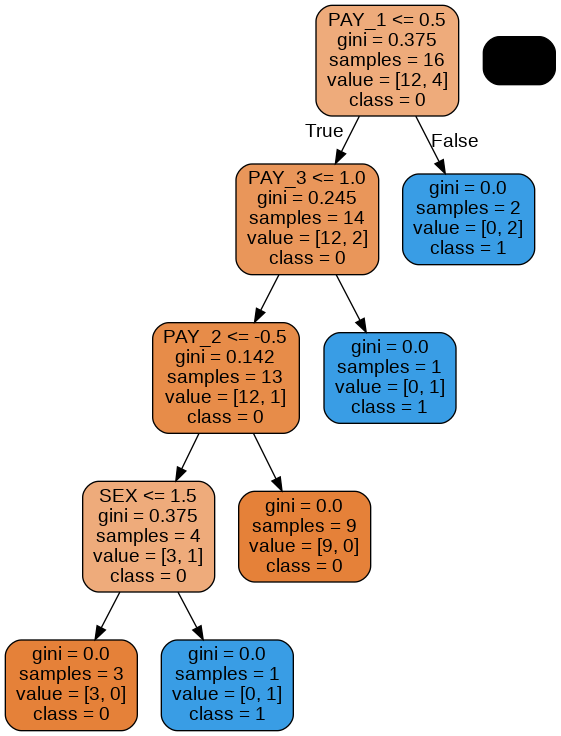

In [ ]:
# S3.3: Visualise the optimised decision tree
dot_data = StringIO()
export_graphviz(decision_tree = d_tree_clf3,out_file = dot_data,filled = True,feature_names = X.columns,class_names = ['0','1'],rounded = True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png('Dot.png')
Image(graph2.create_png())

Let's stop here. In next class we will see how to further improve the performance of the classifier.

---

### **Project**
You can now attempt the **Applied Tech. Project 101 - Decision Tress III** on your own.

**Applied Tech. Project 101 - Decision Tress III**: https://colab.research.google.com/drive/1o8g7TQ4oYcMv3JL-VNjmyYmHfgMdsSzE

---